In [73]:
# 载入此项目需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code 补充的可视化代码

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # use seaborn style 使用seaborn风格

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print('你已经成功载入所有库！')

你已经成功载入所有库！


In [74]:
# 1 TODO：载入波士顿房屋的数据集：使用pandas载入csv，并赋值到data_df
data_df = pd.read_csv('housedata.csv')
data_test = pd.read_csv('test.csv')

# 成功载入的话输出训练数据行列数目
print("Boston housing dataset has {} data points with {} variables each.".format(*data_df.shape))
print("Boston test housing dataset has {} data points with {} variables each.".format(*data_test.shape))

Boston housing dataset has 1460 data points with 81 variables each.
Boston test housing dataset has 1459 data points with 80 variables each.


In [75]:
# 2.1 TODO: 打印出前7条data_df
# print(data_df.head(7))

In [76]:
# 2.2 TODO: 删除data_df中的Id特征（保持数据仍在data_df中，不更改变量名）
data_df.drop(columns=['Id'], inplace=True)
data_test.drop(columns=['Id'], inplace=True)

In [77]:
# 2.3 TODO:
data_df.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


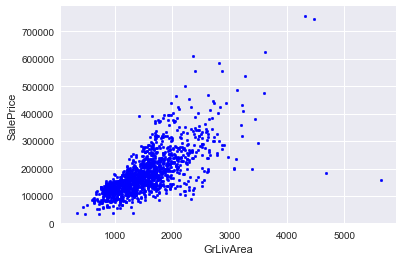

In [78]:
# 3.1.1 TODO:绘制要求的图形
plt.scatter(data_df['GrLivArea'], data_df['SalePrice'], c='blue', marker='.', s=30)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

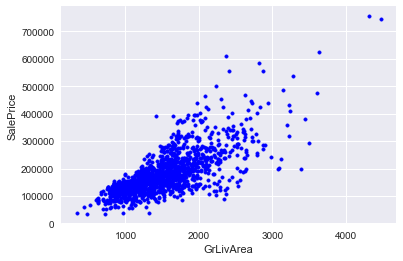

In [79]:
# 3.1.2 
# TODO:从data_df中删除 GrLivArea大于4000 且 SalePrice低于300000 的值
index = data_df[(data_df['GrLivArea'] > 4000) & (data_df['SalePrice'] < 300000)].index
data_df.drop(index=index, inplace=True)

# TODO:重新绘制GrLivArea和SalePrice的关系图，确认异常值已删除
plt.scatter(data_df['GrLivArea'], data_df['SalePrice'], c='blue', marker='.', s=50)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


In [80]:
limit_percent = 0.25
limit_value = len(data_df) * limit_percent
# 3.2.1 TODO 统计并打印出超过25%的空数据的特征，你可以考虑使用isna()
list(data_df.columns[data_df.isna().sum() > limit_value])

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [81]:
# 直接运行不用修改
# 确定所有空特征
missing_columns = list(data_df.columns[data_df.isnull().sum() != 0])
# 确定哪些是类别特征，哪些是数值特征
missing_numerical = list(data_df[missing_columns].dtypes[data_df[missing_columns].dtypes != 'object'].index)
missing_category = [i for i in missing_columns if i not in missing_numerical]
print("missing_numerical:",missing_numerical)
print("missing_category:",missing_category)

missing_numerical: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
missing_category: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [82]:
data_df.mode() # 取众数，返回DataFrame

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20.0,RL,60.0,7200.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,Ex,MnPrv,Shed,0.0,6.0,2009.0,WD,Normal,140000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Gd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# 需要填充众数的特征
fill_Mode = ['Electrical'] 
# 需要填充None的特征
fill_None = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
             'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
# 需要填充0的特征
fill_0 = ['GarageYrBlt']
# 需要填充中位数的特征
fill_median = ['LotFrontage', 'MasVnrArea']
# 3.4.1 TODO：按需填补上面数据
# 我的实现：
# # 填充众数：
# mode = data_df[fill_Mode].mode().iloc[0,0]
# data_df.fillna(value={fill_Mode[0]: mode}, inplace=True)
# # 填充None：
# d_None={}
# for i in fill_None:
#     d_None[i] = 'None'
# data_df.fillna(value=d_None, inplace=True) 
# # 填充0：
# data_df[fill_0].fillna(value=0, inplace=True) 
# # 填充中位数：
# data_df[fill_median].fillna(data_df[fill_median].median(), inplace=True)

# 简化实现：
data_df[fill_Mode] = data_df[fill_Mode].fillna(data_df[fill_Mode].mode())
data_df[fill_None] = data_df[fill_None].fillna('None')
data_df[fill_0] = data_df[fill_0].fillna(0)
data_df[fill_median] = data_df[fill_median].fillna(data_df[fill_median].median())

data_test[fill_Mode] = data_test[fill_Mode].fillna(data_test[fill_Mode].mode())
data_test[fill_None] = data_test[fill_None].fillna('None')
data_test[fill_0] = data_test[fill_0].fillna(0)
data_test[fill_median] = data_test[fill_median].fillna(data_test[fill_median].median())
# 验证
data_test.isna().sum()

MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional       2
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       1
GarageArea       1
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

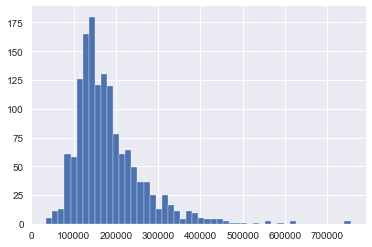

In [84]:
# 4.1 TODO:绘制要求的图形
# plt.hist(data_df['SalePrice'], bins=50, normed=False, color=None)
# plt.xlabel('SalePrice')
# plt.show()
data_df['SalePrice'].hist(bins=50)

回答问题4.1：`'SalePrice'`属于 **正偏态** 分布

In [85]:
import scipy
scipy.stats.skew(data_df['SalePrice'])

1.8793604459195012

   SalePrice  OverallQual  GrLivArea  TotalBsmtSF  GarageCars  1stFlrSF  \
0     208500            7       1710          856           2       856   
1     181500            6       1262         1262           2      1262   
2     223500            7       1786          920           2       920   
3     140000            7       1717          756           3       961   
4     250000            8       2198         1145           3      1145   

   GarageArea  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0         548         2             8       2003          2003  
1         460         2             6       1976          1976  
2         608         2             6       2001          2002  
3         642         1             7       1915          1970  
4         836         2             9       2000          2000  


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,1stFlrSF,GarageArea,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,5,896,882.0,1.0,896,730.0,1,5,1961,1961
1,6,1329,1329.0,1.0,1329,312.0,1,6,1958,1958
2,5,1629,928.0,2.0,928,482.0,2,6,1997,1998
3,6,1604,926.0,2.0,926,470.0,2,7,1998,1998
4,8,1280,1280.0,2.0,1280,506.0,2,5,1992,1992


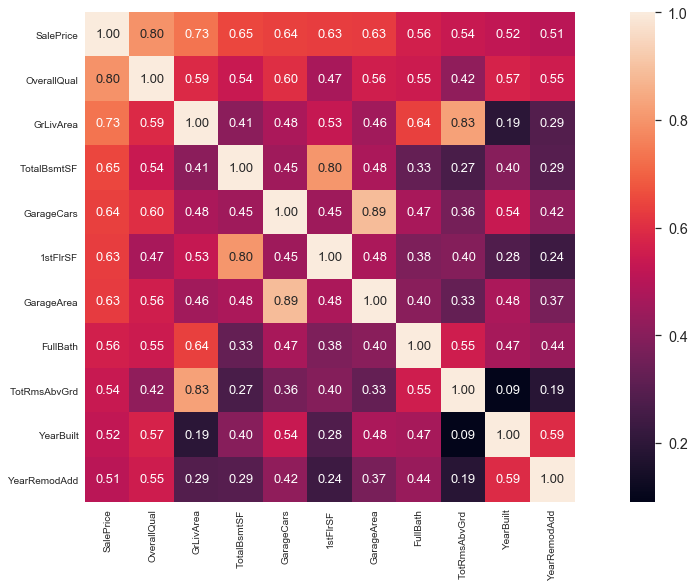

In [86]:
# 不用修改直接运行
corrmat = data_df.corr().abs() #计算连续型特征之间的相关系数
#将于SalePrice的相关系数大于5的特征取出来，并按照SalePrice降序排列，然后取出对应的特征名，保存在列表中
top_corr = corrmat[corrmat["SalePrice"]>0.5].sort_values(by = ["SalePrice"], ascending = False).index 
cm = abs(np.corrcoef(data_df[top_corr].values.T)) #注意这里要转置，否则变成样本之间的相关系数，而我们要计算的是特征之间的相关系数
f, ax = plt.subplots(figsize=(20, 9))
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f', annot_kws={'size': 13}, 
                 yticklabels=top_corr.values, xticklabels=top_corr.values);
top_corr = list(top_corr)
data_df = data_df[top_corr]
print(data_df.head())

top_corr.remove('SalePrice')
data_test = data_test[top_corr]
data_test.head()

In [87]:
# 不要修改，直接运行
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler

data_df['SalePrice'] = np.log1p(data_df['SalePrice']) # np.log1p()函数将数据从偏态分布转换成标准正态分布
numeric_features = list(data_df.columns)
numeric_features.remove('SalePrice')
for feature in numeric_features:
    #all_data[feat] += 1
    data_df[feature] = boxcox1p(data_df[feature], 0.15)
    data_test[feature] = boxcox1p(data_test[feature], 0.15)

scaler = StandardScaler()
scaler.fit(data_df[numeric_features])
data_df[numeric_features] = scaler.transform(data_df[numeric_features])
data_test[numeric_features] = scaler.transform(data_test[numeric_features])
# data_test.isna().sum()
data_test = data_test.fillna(0)

In [88]:
# 5.1 TODO: 引入 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: 计算 'y_true' 与 'y_predict' 的r2值
    score = r2_score(y_true, y_predict)
    
    # 返回这一分数
    return score

In [89]:
# TODO: 6.1 
labels = data_df['SalePrice']#TODO：提取SalePrice作为labels
features = data_df.drop(['SalePrice'], axis=1)#TODO：提取除了SalePrice以外的特征赋值为features

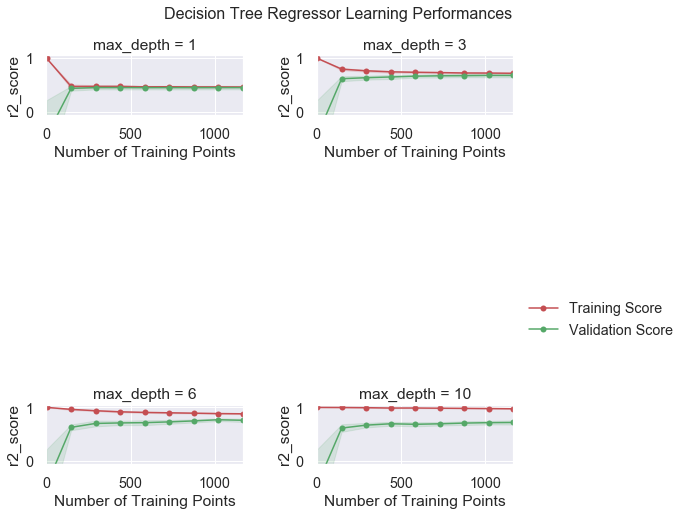

In [90]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, labels)

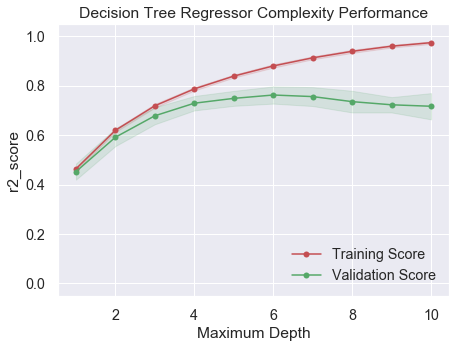

In [91]:
vs.ModelComplexity(features, labels)

In [92]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    cross_validator = KFold(n_splits=10)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=1)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[i for i in range(1, 11)]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cross_validator' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv = cross_validator)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_, grid.best_score_

In [93]:
# Fit the training data to the model using grid search
reg, score = fit_model(features, labels)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("The best r2_score for the optimal model is {} .".format(score))

Parameter 'max_depth' is 7 for the optimal model.
The best r2_score for the optimal model is 0.7704422586108907 .


In [94]:
depth = 7
regressor = DecisionTreeRegressor(max_depth = depth)
regressor.fit(features, labels)
y_pred = regressor.predict(data_test) 
# score = performance_metric(y_test, y_pred)
# print("The R2 score is ",score)

In [97]:
y_pred = np.expm1(y_pred)

In [99]:
data_output = pd.DataFrame(y_pred, columns=['SalePrice'])

In [101]:
data_output.to_csv('submission.csv', index=False)